# Explore here

In [2]:
# Your code here
import requests
import os
import pandas as pd

In [3]:
import pandas as pd 

df = pd.read_csv("../data/raw/data.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

This DataFrame contains 48,895 rows and 16 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

From this info, we can see that we have some NaN values, most being from last_review and reviews_per_month columns

In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Eliminate irrelevant info

In [7]:
# Drop the data that is sensitive info, we don't need it
df.drop(['id','name', 'host_name', 'last_review', 'reviews_per_month'], axis=1, inplace=True)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [8]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

After deleting the irrelevant information, we can see that we don't have any null values. Therefore, it's ready to use this DataFrame for analysis

### Analysis

In [9]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

We can see that we have only 5 areas in our DataFrame

In [10]:
df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [11]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

We have 3 different room types in total: Private room, entire home, shared room

In [12]:
df.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

## Visualize some data

### The most common room types

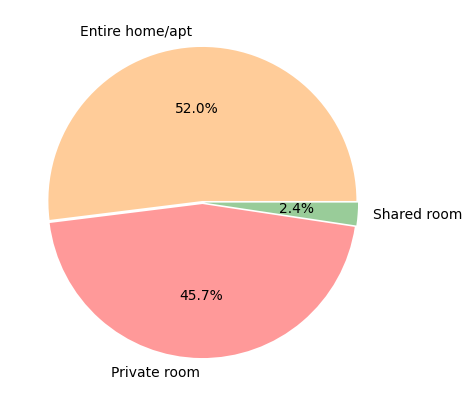

In [13]:
import matplotlib.pyplot as plt

room_type_pie = df['room_type'].value_counts()
explode = (0.01, 0.01, 0.01)
pastel_colors = ['#FFCC99', '#FF9999', '#99CC99']
plt.figure(figsize=(5, 5))
plt.pie(room_type_pie, labels=room_type_pie.index.tolist(), autopct='%1.1f%%', explode=explode, colors=pastel_colors)
plt.show()

### Most common neighbourhood groups

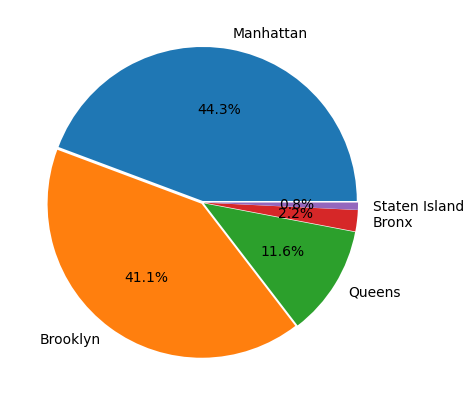

In [14]:

neigbhd_type_frequency = df.neighbourhood_group.value_counts()
plt.figure(figsize=(5,5))
explode = (0.01, 0.01, 0.01, 0.01, 0.01)
plt.pie(neigbhd_type_frequency, labels=neigbhd_type_frequency.index.tolist(), autopct='%1.1f%%', explode=explode)
plt.show()

### Analysis of univariate variables

Categorical values

/tmp/ipykernel_7964/482048410.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.histplot(ax = axis[0,1], data= df, x = 'room_type').set_xticklabels(['Private room', 'Entire home/apt', 'Shared room'], rotation=45)


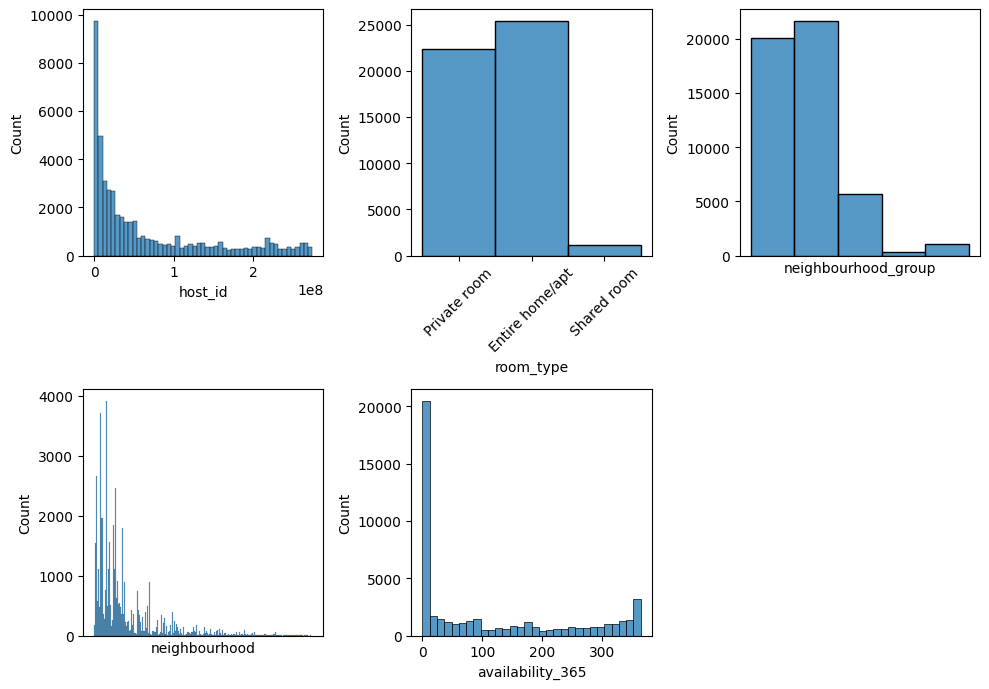

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10,7))

sns.histplot(ax = axis[0,0], data= df, x = 'host_id')
sns.histplot(ax = axis[0,1], data= df, x = 'room_type').set_xticklabels(['Private room', 'Entire home/apt', 'Shared room'], rotation=45)
sns.histplot(ax = axis[0,2], data= df, x = 'neighbourhood_group').set_xticks([])
sns.histplot(ax = axis[1,0], data= df, x = 'neighbourhood').set_xticks([])
sns.histplot(ax = axis[1,1], data= df, x = 'availability_365')
fig.delaxes(axis[1, 2])


plt.tight_layout()

plt.show()



From the histograms, we can observe that:

- There is a lot of Hosts renting a lot of rooms. There is also a huge number of NaN values for the the host_id
- There are a lot of airbnb's with private rooms and entire home available, the entire home being the most offered and the shared room being the least offered.
- We have 5 main areas in this dataset: Brooklyn, Manhattan, Queens, Staten Island and Bronx.
- The availability of rooms is very relative, but we can see that the majority is available 365 days p/year. There's also a lack of information on this aspect, that's why we can see a lot of 0 present in the histogram

Numeric Values

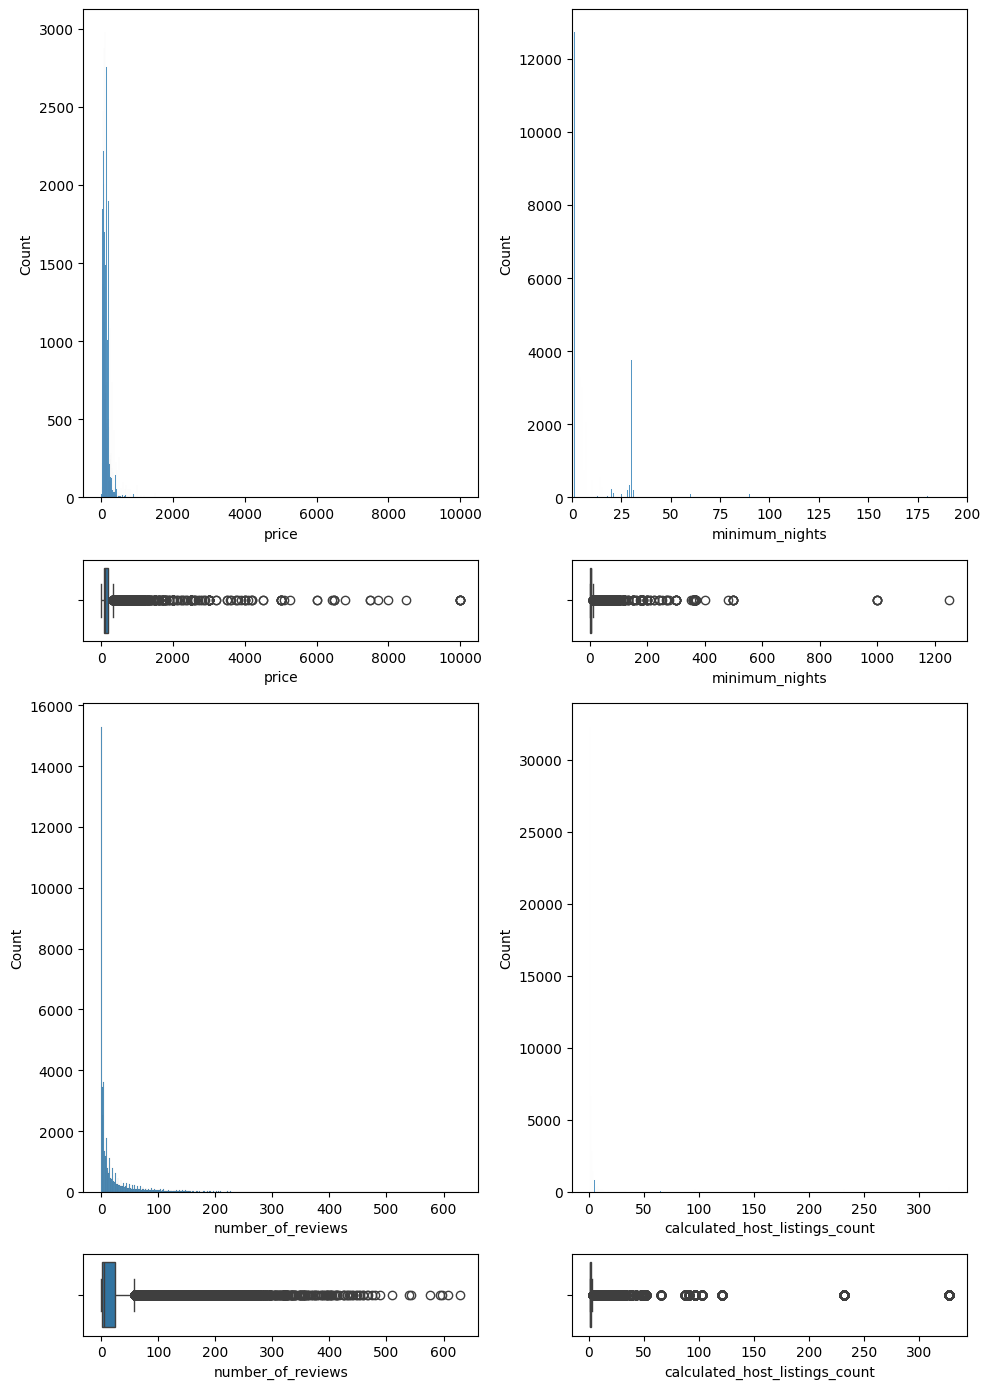

In [16]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]}) 
#this height ratio is very useful when using two plots for the same data, to visualize the distribution better

sns.histplot(ax = axis[0, 0], data = df, x = "price")
sns.boxplot(ax = axis[1, 0], data = df, x = "price")

sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = df, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = df, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = df, x = "calculated_host_listings_count")

plt.tight_layout()

plt.show()

### Analysis of multivariate variables

Numerical-numerical analysis

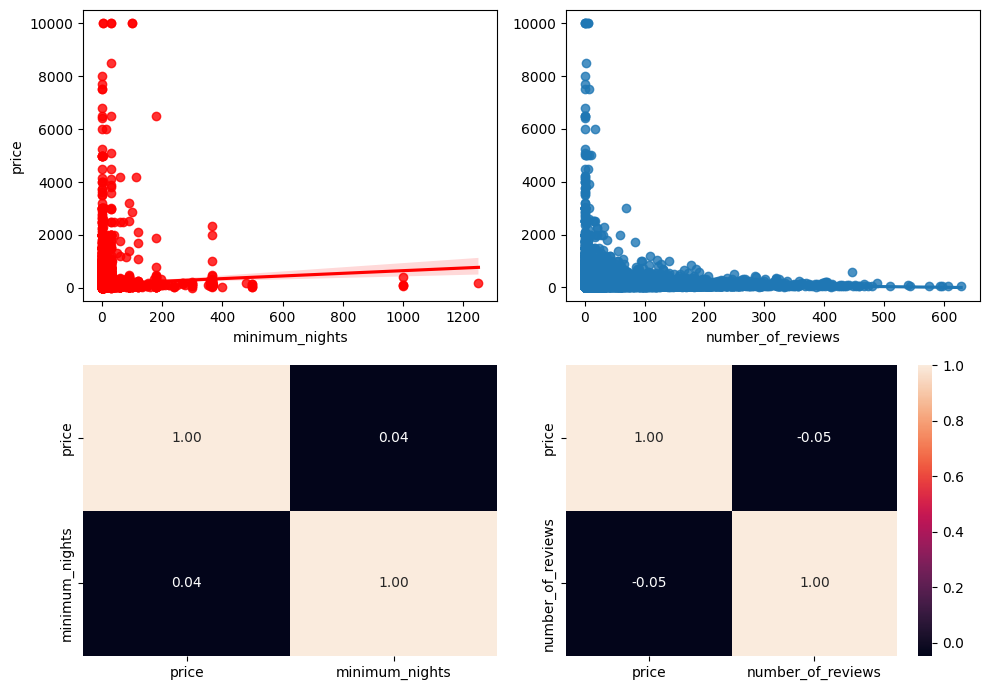

In [17]:

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price", color='red')
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
#.2f = to have my annotations displayed as percentages with 2 decimal places

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

We can see from these plots that there is no correlation between price and minimum nights and between the price and the number of reviews

#### Categorical-categorical analysis

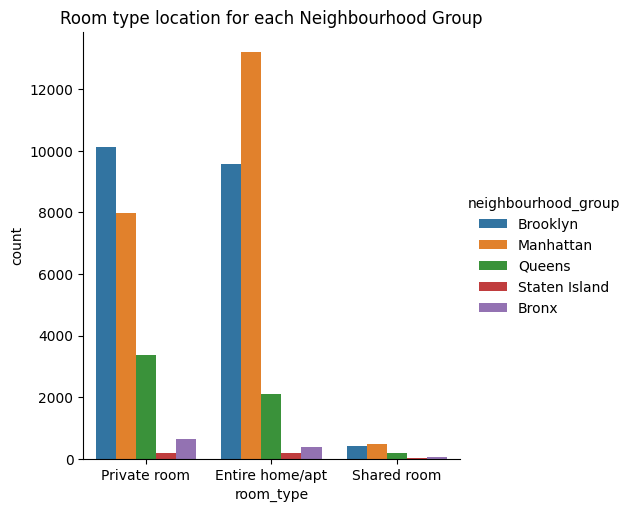

In [18]:
title = 'Room type location for each Neighbourhood Group'
sns.catplot(x='room_type', kind="count", hue="neighbourhood_group", data=df)
plt.title(title)
plt.show()

### Correlation between all data

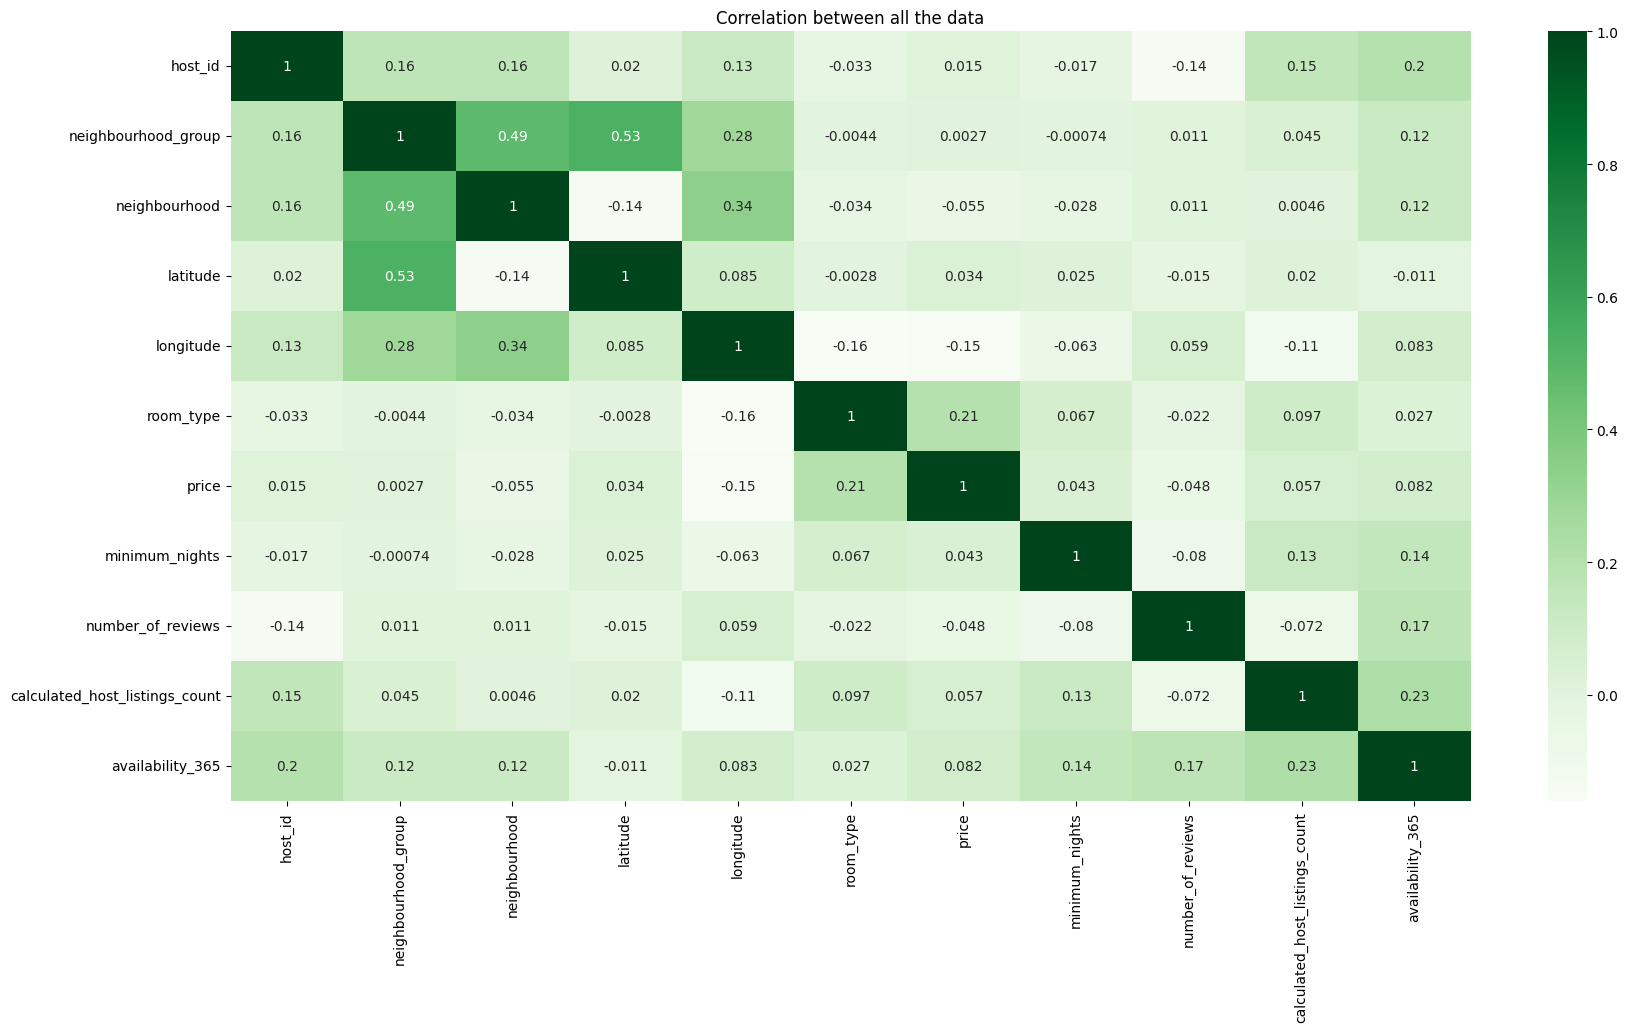

In [19]:

plt.figure(figsize=(20,10))

df["room_type"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]

sns.heatmap(df.corr(), cbar=True, annot=True, cmap='Greens')
plt.title('Correlation between all the data')
plt.show()

There's not really a correlation between all data

## Outliers

In [20]:
df.describe()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


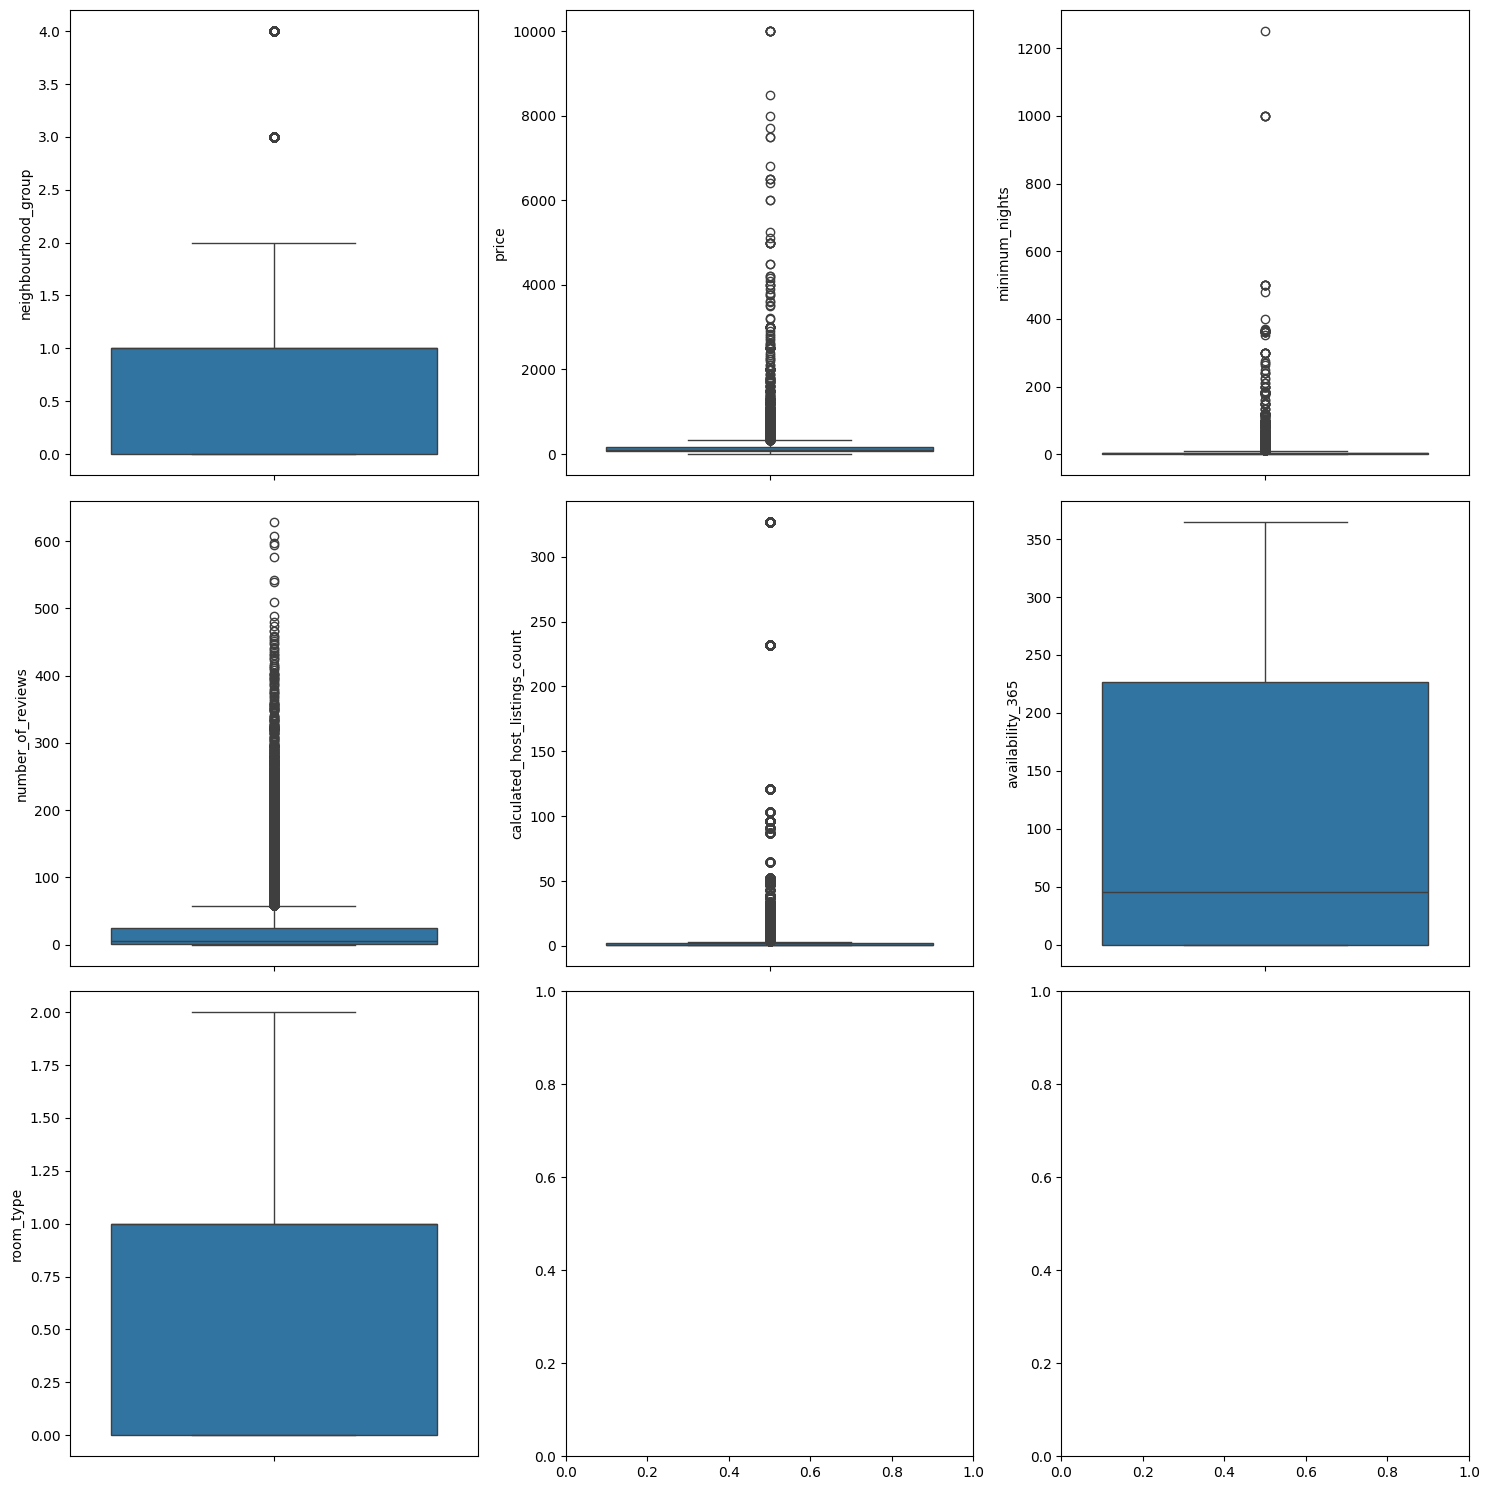

In [21]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = df, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = df, y = "price")
sns.boxplot(ax = axes[0, 2], data = df, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = df, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = df, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = df, y = "room_type")

plt.tight_layout()

plt.show()

### Finding the outliers for price

In [22]:
price_stats = df['price'].describe()

In [23]:
price_iqr = price_stats['75%'] - price_stats['25%']
upper_limit = price_stats['75%'] + 1.5 * price_iqr
lower_limit = price_stats['25%'] - 1.5 * price_iqr

print('Upper limit:', round(upper_limit, 2))
print('Lower limit:', round(lower_limit, 2))
print('Interquartile:', price_iqr)

Upper limit: 334.0
Lower limit: -90.0
Interquartile: 106.0


#### Cleaning the outliers:

In [24]:
#storing only the data greater than 0, filtering it
df = df.loc[df['price'] > 0]

In [25]:
df['price'].describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

We can now see that the minimum price starts at 10

### We can also clean the price outliers to see better the distributions between the most common prices

In [26]:
import numpy as np

percentiles = np.linspace(.05, 1, num = 20) #let's display the percentiles between 5% and 100% 
price_stats = df['price'].describe(percentiles = percentiles)

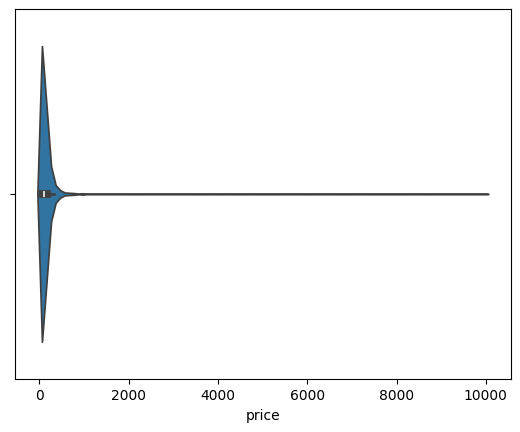

In [27]:
sns.violinplot(data=df, x=df['price'])

plt.show()

In [28]:
percentile_05 = price_stats['5%']
percentile_95 = price_stats['95%']

df_clean = df[(percentile_05 <= df['price']) & (df['price'] <= percentile_95)]

In [29]:
df_clean.describe()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.441200e+04,44412.000000,44412.000000,44412.000000,44412.000000,44412.000000,44412.000000,44412.000000,44412.000000,44412.000000,44412.000000
mean,6.528207e+07,0.774588,29.295100,40.729198,-73.952173,0.553612,126.721066,6.847947,24.100603,6.692020,109.308002
std,7.735060e+07,0.833272,34.014281,0.054349,0.045547,0.527110,70.919013,20.017732,45.499870,31.654081,130.085501
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,40.000000,1.000000,0.000000,1.000000,0.000000
25%,7.463080e+06,0.000000,8.000000,40.690190,-73.982640,0.000000,70.000000,1.000000,1.000000,1.000000,0.000000
50%,2.910057e+07,1.000000,19.000000,40.722820,-73.955400,1.000000,105.000000,2.000000,6.000000,1.000000,40.000000
75%,1.027994e+08,1.000000,34.000000,40.763562,-73.936988,1.000000,165.000000,5.000000,25.000000,2.000000,216.000000
max,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,355.000000,1250.000000,629.000000,327.000000,365.000000


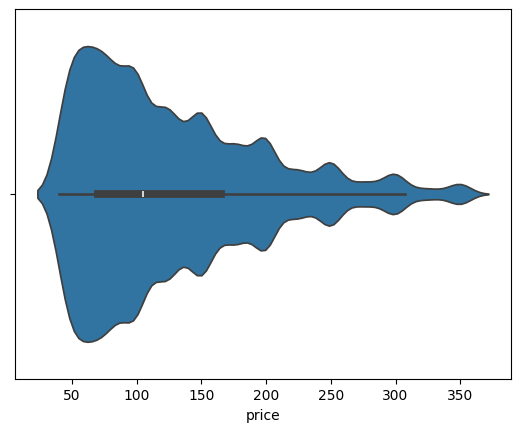

In [30]:
sns.violinplot(data= df_clean, x=df_clean['price'])

plt.show()

#### Finding outliers for minimum nights

In [31]:
min_nights_stats = df['minimum_nights'].describe()
min_nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [32]:
min_nights_iqr = min_nights_stats['75%'] - min_nights_stats['25%']
upper_lim = min_nights_stats['75%'] + 1.5 * min_nights_iqr
lower_limit = min_nights_stats['25%'] - 1.5 * min_nights_iqr

print('Upper limit:', round(upper_lim, 2))
print('Lower limit:', round(lower_limit, 2))
print('Interquartile', min_nights_iqr)

Upper limit: 11.0
Lower limit: -5.0
Interquartile 4.0


Here we can see that the upper limit for minimum nights is 11, but we can assume that 11 days for minimum nights are not that rare. Depending on the context, I'm gonna assume that when renting an airbnb, it's reasonable to choose at least 15 minimum nights. So I will delete the minimum nights greater than 15

In [33]:
df = df[df["minimum_nights"] <= 15]

In [34]:
df['minimum_nights'].describe()

count    43265.000000
mean         2.962857
std          2.500413
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         15.000000
Name: minimum_nights, dtype: float64

### Feature Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

column_features = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[column_features])
df_scal = pd.DataFrame(scal_features, index = df.index, columns = column_features)
df_scal["price"] = df["price"]
df_scal.head()


,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.014308,0.000000,0.015337,1.000000,0.00,0.0,149
1,0.071542,0.000000,0.003067,0.972603,0.25,0.5,225
2,0.000000,0.142857,0.000000,1.000000,0.25,0.0,150
3,0.429253,0.000000,0.000000,0.531507,0.00,0.5,89
4,0.014308,0.642857,0.000000,0.000000,0.25,0.5,80


We normalize all these variables (column_features) so we can have all of them at the same scale to be easier to analyse it after. This is also important for improving the performance and stability of machine learning algorithms

### Feature Selection

In [36]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type
0,0.000000,0.000000,0.569863,1.0
1,0.428571,0.141104,0.969863,0.0
2,0.000000,0.000000,0.504110,0.0
3,0.285714,0.000000,0.400000,0.5
4,0.071429,0.000000,0.756164,0.5


In [37]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)